### Analysis through web-scrapping and dataframe merging

Data used was extracted through web scrapping two wikipedia webpages (on March 31, 2025) and use the two resultant data frames for analysis . The goal was to explore a list of countries by stock market capitalization and investigate the top exports for the top 20 countries.

In [30]:
import requests
from bs4 import BeautifulSoup as bs, Tag
import re
import pandas as pd
import time
from matplotlib import pyplot as plt
import seaborn as sns

In [31]:
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_stock_market_capitalization'
page = requests.get(url)
response = requests.get(url)
html = response.text
status = response.status_code
if status == 200:
    page = response.text
    soup = bs(page)
else:
    print(f"Oops! Received status code {status}")


In [32]:
table = soup.find_all('table')[0]


In [33]:
 #Initialize a list to hold the headers
final_headers = []

# Assuming `table` is the BeautifulSoup object containing the <table> element

# Get the first row in the <thead> section (usually the first <tr>)
first_row = table.find_all('tr')[0]

# Get the second row for subcolumns (detailed headers)
second_row = table.find_all('tr')[1]

# Lists to store headers and subheaders
main_headers = []
subheaders = []

# Process the first row for main headers
for cell in first_row.find_all('th'):
    # Remove <sup> tags and their content
    for sup in cell.find_all('sup'):
        sup.decompose()
    # Get the text content, replacing <br/> with a space
    text = cell.get_text(separator=' ', strip=True).replace('\xa0', ' ')
    # Determine the number of columns this header spans (colspan)
    colspan = int(cell.get('colspan', 1))
    # Add the main header text to the list for the number of columns it spans
    main_headers.extend([text] * colspan)

# Process the second row for subheaders
for cell in second_row.find_all('th'):
    # Remove <sup> tags and their content
    for sup in cell.find_all('sup'):
        sup.decompose()
    # Get the text content, replacing <br/> with a space
    text = cell.get_text(separator=' ', strip=True).replace('\xa0', ' ')
    subheaders.append(text)

# Combine main headers with corresponding subheaders
final_headers = []
subheader_index = 0

for header in main_headers:
    # If we are still within the subheaders range, we add the subheaders
    if subheader_index < len(subheaders):
        if "Total market cap" in header:
            final_headers.append(f'{header}: {subheaders[subheader_index]}')
            subheader_index += 1
        else:
            final_headers.append(header)
    else:
        final_headers.append(header)

# Display the final headers with tab separation
print("\t".join(final_headers))

Country / Territory	Total market cap: millions of US$	Total market cap: % of GDP	Number of domestic companies	Data Year


In [34]:
df = pd.DataFrame(columns = final_headers)
df

,Country / Territory,Total market cap: millions of US$,Total market cap: % of GDP,Number of domestic companies,Data Year


In [35]:
column_data = table.find_all('tr')



In [36]:
# Function to clean citations (numbers in brackets)
def clean_citations(text):
    return re.sub(r'\[\d+\]', '', text)  # Remove all citations like [5], [6], etc.

# List to store cleaned data
cleaned_data = []

# Iterate through each row in column_data
for row in column_data:
    if row:  # Ensure row is not None
        print(f"Processing row: {row}")  # Debugging: See the row content
        
        # Check if row is a BeautifulSoup object or HTML string
        if isinstance(row, str):
            # Directly pass the HTML string to BeautifulSoup
            table = bs(row, 'html.parser')
        elif isinstance(row, Tag):  # Now correctly use Tag from BeautifulSoup
            # If row is already a BeautifulSoup element, extract its HTML string
            table = row
        
        # Now process the table for <td> elements
        row_data = [clean_citations(cell.text.strip()) for cell in table.find_all('td')]
        cleaned_data.append(row_data)

    else:
        print("Encountered an empty row.")   

Processing row: <tr>
<th rowspan="2">Country / Territory
</th>
<th colspan="2">Total market cap
</th>
<th rowspan="2">Number of<br/>domestic<br/>companies
</th>
<th rowspan="2">Data<br/>Year
</th></tr>
Processing row: <tr class="static-row-header">
<th>millions<br/>of US$
</th>
<th>% of<br/>GDP
</th></tr>
Processing row: <tr>
<td><span class="flagicon"><span class="mw-image-border" typeof="mw:File"><span><img alt="" class="mw-file-element" data-file-height="13" data-file-width="23" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/5/5d/Flag_of_the_United_States_%2823px%29.png" width="23"/></span></span> </span><a href="/wiki/United_States" title="United States">United States</a>
</td>
<td>62,185,685
</td>
<td>213.1
</td>
<td>4,010
</td>
<td>2024
</td></tr>
Processing row: <tr>
<td><span class="flagicon"><span class="mw-image-border" typeof="mw:File"><span><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="1

In [37]:

#Iterate through cleaned data (excluding the first two rows)
for row in cleaned_data[2:]:
    # Since each row is already a list, just strip any leading/trailing spaces if necessary
    individual_row_data = [data.strip() for data in row]  # Strip each element in the row

    # Add the row to the DataFrame
    df.loc[len(df)] = individual_row_data

# Output the DataFrame
print(df)

    Country / Territory Total market cap: millions of US$  \
0         United States                        62,185,685   
1                 China                        11,870,548   
2                 Japan                         6,358,159   
3                 India                         5,320,626   
4             Hong Kong                         5,022,179   
..                  ...                               ...   
108              Latvia                               408   
109             Myanmar                               325   
110               Sudan                               231   
111                Laos                                83   
112            Mongolia                             0.388   

    Total market cap: % of GDP Number of domestic companies Data Year  
0                        213.1                        4,010      2024  
1                         62.7                       11,231      2025  
2                        156.7                     

In [38]:
df

,Country / Territory,Total market cap: millions of US$,Total market cap: % of GDP,Number of domestic companies,Data Year
0,United States,"62,185,685",213.1,"4,010",2024
1,China,"11,870,548",62.7,"11,231",2025
2,Japan,"6,358,159",156.7,"3,971",2025
3,India,"5,320,626",127,"5,707",2025
4,Hong Kong,"5,022,179",131.1,"2,673",2025
...,...,...,...,...,...
108,Latvia,408,1.0,56,2025
109,Myanmar,325,—,—,2025
110,Sudan,231,0.9,—,2021
111,Laos,83,—,—,2025


In [39]:
df.rename(columns = {'Country / Territory': 'Country'}, inplace = True)

In [40]:
#getting a subset of only the top 20 on the list
top20 = df.iloc[0:20].copy() # Select rows at indices 1 and 2 (exclusive of 3)
print(top20)

                 Country Total market cap: millions of US$  \
0          United States                        62,185,685   
1                  China                        11,870,548   
2                  Japan                         6,358,159   
3                  India                         5,320,626   
4              Hong Kong                         5,022,179   
5                 Canada                         3,499,751   
6                 France                         3,421,737   
7         United Kingdom                         3,182,091   
8           Saudi Arabia                         2,667,273   
9                 Taiwan                         2,251,495   
10               Germany                         2,044,249   
11           Switzerland                         1,881,413   
12             Australia                         1,878,429   
13                  Iran                         1,743,023   
14           South Korea                         1,680,766   
15      

In [41]:
#.loc selects data based on the labels of the rows not integer positions 
top20.loc[:, 'Continent'] = top20['Country'].replace({'United States':'North America', 
                                                        'Canada':'North America', 'China':'Asia', 'Hong Kong':'Asia',
                                                        'Japan':'Asia', 'India':'Asia', 'South Korea':'Asia',
                                                         'Iran':'Asia', 'Taiwan':'Asia', 'Saudi Arabia':'Asia',
                                                         'United Arab Emirates':'Asia', 'France':'Europe',
                                                        'United Kingdom':'Europe', 'Germany':'Europe',
                                                        'Netherlands':'Europe', 'Switzerland':'Europe',
                                                        'Spain':'Europe', 'Sweden':'Europe', 'Australia':'Australia',
                                                         'South Africa':'Africa'})


## Question 1 ##
#### Which continents are represented in the top 20 countries with the highest stock market capitalization? ####


## Plotting the Distribution per Continent ##

In [44]:
continent_counts = top20['Continent'].value_counts(dropna=False)
continent_counts

Continent
Asia             9
Europe           7
North America    2
Australia        1
Africa           1
Name: count, dtype: int64

In [45]:
sns.set_style('darkgrid')

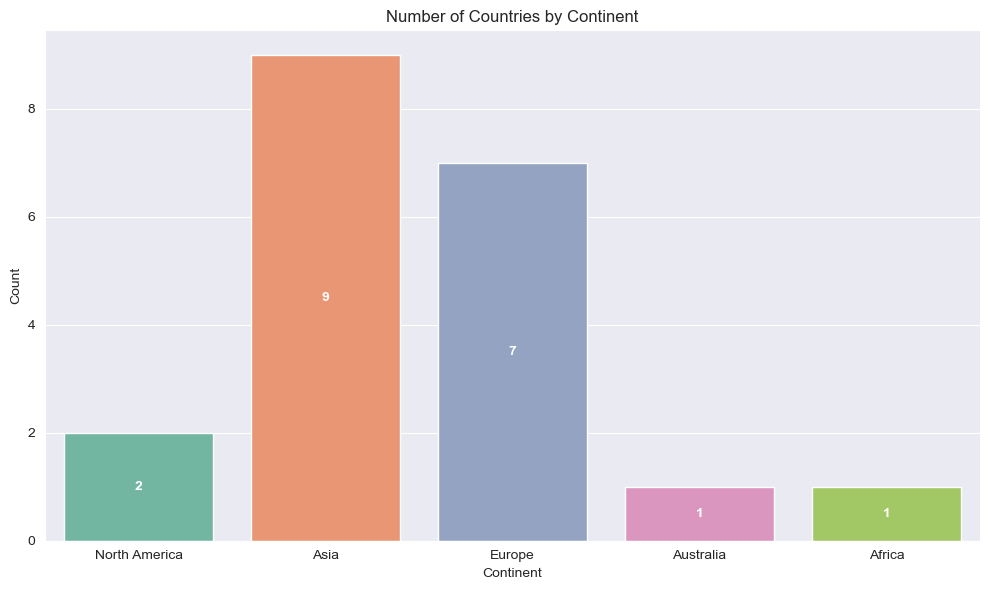

In [46]:
# use f'{int(height)} so that the nmbers display as integers
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Continent', hue='Continent', data=top20, palette='Set2', legend=False)

# Add integer counts inside the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height / 2),
                ha='center', va='center', fontsize=10, color='white', fontweight='bold')

plt.title('Number of Countries by Continent')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Answer 1 ###
* All the continents have representation except for South America (Antactica being excluded from the analysis) 
* Asia and Europe have the most countries (9 and 7 respectively) with listed companies that have high stock market capitalization 
*  Market capitalization is widely used to assess the size of companies by looking at the total dollar market value of a company's outstanding shares of stock 

In [48]:
df1 = pd.read_csv('exports.csv')

## Question 2 ##
### What are the top exports for the top 20 countries with the highest market capitalization? ###



In [50]:
# Merge the two DataFrames on the 'Country' column
df_merged = pd.merge(df, df1, on='Country', how='inner')
print(df_merged)

           Country Total market cap: millions of US$  \
0    United States                        62,185,685   
1    United States                        62,185,685   
2            China                        11,870,548   
3            China                        11,870,548   
4            Japan                         6,358,159   
..             ...                               ...   
213          Sudan                               231   
214           Laos                                83   
215           Laos                                83   
216       Mongolia                             0.388   
217       Mongolia                             0.388   

    Total market cap: % of GDP Number of domestic companies Data Year  \
0                        213.1                        4,010      2024   
1                        213.1                        4,010      2024   
2                         62.7                       11,231      2025   
3                         62.7     

In [51]:
#correct indexing after duplicates have been removed
df_merged = df_merged.drop_duplicates(subset=['Country']).reset_index(drop=True)
df_merged

,Country,Total market cap: millions of US$,Total market cap: % of GDP,Number of domestic companies,Data Year,Exports,Year,Top goods export (2021)
0,United States,"62,185,685",213.1,"4,010",2024,"3,051,824",2023,Petroleum
1,China,"11,870,548",62.7,"11,231",2025,"3,511,248",2023,Broadcasting equipment
2,Japan,"6,358,159",156.7,"3,971",2025,"920,737",2023,Cars
3,India,"5,320,626",127,"5,707",2025,"773,223",2023,Petroleum
4,Canada,"3,499,751",150.6,"4,226",2025,"717,677",2023,Petroleum
...,...,...,...,...,...,...,...,...
104,Latvia,408,1.0,56,2025,"28,854",2022,Wood
105,Myanmar,325,—,—,2025,"17,523",2019,Clothing
106,Sudan,231,0.9,—,2021,"5,908",2022,Gold
107,Laos,83,—,—,2025,"7,819",2021,Energy


In [52]:
#subset to have country and exports columns from different dataframes
country_exports = df_merged.loc[0 : 19, ['Country', 'Top goods export (2021)']]  # Rows 0 to 19, columns Country and top goods exports
print(country_exports)

                 Country Top goods export (2021)
0          United States               Petroleum
1                  China  Broadcasting equipment
2                  Japan                    Cars
3                  India               Petroleum
4                 Canada               Petroleum
5                 France    Packaged medications
6         United Kingdom                    Gold
7           Saudi Arabia               Petroleum
8                 Taiwan     Integrated circuits
9                Germany                    Cars
10           Switzerland                    Gold
11             Australia                Iron ore
12                  Iran                 Plastic
13           South Korea     Integrated circuits
14           Netherlands               Petroleum
15                 Spain                    Cars
16                Sweden                    Cars
17  United Arab Emirates               Petroleum
18          South Africa                Platinum
19                 I

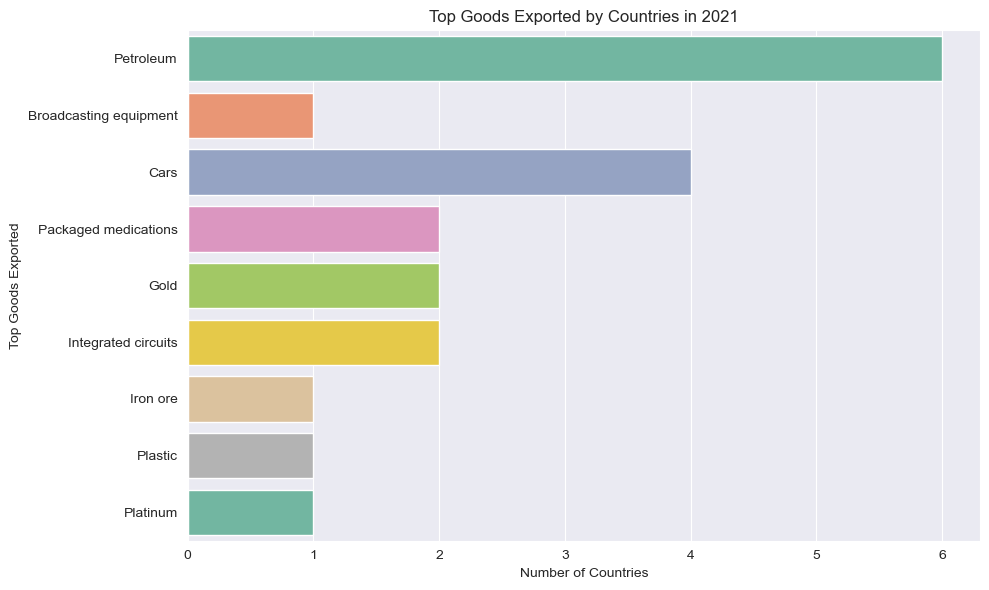

In [53]:
plt.figure(figsize=(10, 6))
sns.countplot(
    y='Top goods export (2021)',
    data=country_exports,
    hue='Top goods export (2021)',  # assign hue
    palette='Set2',
    legend=False  # turn off the extra legend since y-axis already shows labels
)

# Set labels and title
plt.xlabel('Number of Countries')
plt.ylabel('Top Goods Exported')
plt.title('Top Goods Exported by Countries in 2021')

plt.tight_layout()
plt.show()


### Answer 2  ###
* The top exports for the countries with the largest market capitalization include commodities: petrolium, gold, integrated circuits, iron ore and cars
* These are common top exports for at least 2 countries in the top 20
* The commodities exported by the most countries are petrolium (6 countries) and cars (4 countries)

### Further exploration
1. Study the companies from these countries that are in the stock market and explore sectors they are in.
2. What had taken these countries to the top of the list? is it the number of companies on the stock exchange or the sizes or both?

### References ###
merging using a common colum: ChatGPT, response to “how to merge two dataframes,” April 10, 2025, ChatGPT, https://chatgpt.com/
using drop_duplicates and reset_index: ChatGPT, response to “removing duplicates and correcting indexing,” April 12, 2025, ChatGPT, https://chatgpt.com/